#### Nadir Meskache & Lucas Weinberg
#### MATH-F314
#### Devoir n°2

# Introduction 

Nous nous intéressons dans ce devoir à l'advection-diffusion d'un fluide incompressible dans un milieu poreux. Ce phénomène obéit à : 

$$
\phi\dfrac{\partial C}{\partial t} = -\textbf{u}.\nabla C + \phi D \nabla^2C
$$

Qui est l'équation d'advection-diffusion adjointe du terme $\phi$, porosité du milieu. On nous donne une équation adimensionnalisée que nous devons résoudre numériquement. Les premières questions sont d'abord des manipulations algébriques qui nous permettront de mieux appréhender le problème avant d'attaquer les méthodes numériques.

## Question 1

$$
w(\xi(z,t),t)=w'(z,t)\\
c(\xi(z,t),t)=c'(z,t)
$$
On a 
$$
\dfrac{\partial w'}{\partial z} = \dfrac{\partial }{\partial z}w = \dfrac{\partial w}{\partial \xi}\dfrac{\partial \xi}{\partial z}
$$

D'après les données du problème, $ \xi = z \sqrt{\dfrac{Ra}{4t}}$, et donc $\dfrac{\partial \xi}{\partial z} = \sqrt{\dfrac{Ra}{4t}}$

Il vient :
$$
\dfrac{\partial w}{\partial z^2} = \dfrac{\partial }{\partial z}\bigg(\dfrac{\partial w}{\partial \xi}\dfrac{\partial \xi}{\partial z}\bigg) =\dfrac{\partial^2 w}{\partial \xi^2}\bigg(\dfrac{\partial \xi}{\partial z}\bigg)^2 + \dfrac{\partial w}{\partial \xi}\dfrac{\partial^2 \xi}{\partial z^2}
$$
Le dernier terme vaut 0, et donc finalement :

$$
\dfrac{\partial w}{\partial z} = \dfrac{Ra}{4t}\dfrac{\partial^2 w}{\partial \xi^2}
$$

Ensuite, dérivons $c$ :
$$
\dfrac{\partial c'}{\partial t} = \dfrac{\partial c}{\partial t} = \dfrac{\partial c}{\partial \xi}\dfrac{\partial \xi}{\partial t} + \dfrac{\partial c}{\partial t}
$$

$ z = \xi \sqrt{\dfrac{4t}{Ra}}\ $et   $\ \dfrac{\partial \xi}{\partial t} = -\dfrac{z}{4t}\sqrt{\dfrac{Ra}{t}}$

Alors $\dfrac{\partial \xi}{\partial t} = -\dfrac{\xi}{4t}\sqrt{\dfrac{4t}{Ra}}.\sqrt{\dfrac{Ra}{t}}= \dfrac{-\xi}{2t}$

Et donc :
$$
\dfrac{\partial c}{\partial t} = \dfrac{-\xi}{2t}\dfrac{\partial c}{\partial \xi} + \dfrac{\partial c}{\partial t}
$$

Ce qui aboutit bien à la forme recherchée.

## Question 2

On nous donne ici deux opérateurs : 

$$ 
 L_{i,j} = \bigg(\dfrac{Ra}{4t}\dfrac{\partial^2}{\partial \xi^2}-k^2\bigg)_{i,j}
$$
et 
$$
     M_{i,j} = \dfrac{1}{t}\bigg(\dfrac{1}{4}\dfrac{\partial^2}{\partial \xi^2} + \dfrac{\xi}{2}\dfrac{\partial}{\partial \xi}-\dfrac{k^2t}{Ra}\bigg)_{i,j}
$$

On peut approximer la dérivée seconde d'une fonction via la méthode des différences finies : 

$$
\dfrac{\partial^2 f}{\partial \xi^2} = \dfrac{f_{i-1}-2f_i+f_{i+1}}{(\Delta\xi)^2} + O(\Delta\xi)^2
$$
On a donc alors pour le premier opérateur :
$$
L_{i,j} = \bigg(\dfrac{Ra}{4t}\dfrac{1}{(\Delta\xi)^2}.\hat{\textbf{A}} - k^2    \mathbb{1}\bigg)
$$
Avec $\hat{\textbf{A}}$ une matrice $99 \times 99$ de la forme :


<br>
$$
\hat{\textbf{A}} = \begin{bmatrix}
-2 & 1 & 0 &.& ... && 0 \\
1 & -2 & 1 &.&... && 0 \\
0 & 1 & . &.& ... && 0 \\
. & ... &.& . &.&& .\\       
. & ... &&.&.& 1 & 0 \\
. & ... &&&1& -2 & 1 \\       
0 & ... &&&0& 1 & -2 \\ 
\end{bmatrix}
$$
<br>

La dérivée première d'une fonction quand à elle peut s'exprimer (toujours au sens des différences finies): 

$$
\dfrac{\partial f}{\partial \xi} = \dfrac{f_{i+1}-f_{i-1}}{2\Delta\xi} + O(\Delta\xi)^3
$$

On peut donc écrire le deuxième opérateur :
$$
M_{i,j} = \dfrac{1}{t}\bigg(\dfrac{1}{4(\Delta \xi)^2}\hat{\textbf{A}}+\dfrac{\xi}{4\Delta \xi} \hat{\textbf{B}} -\dfrac{k^2t}{Ra}\mathbb{1}\bigg)_{i,j}
$$

$\hat{\textbf{A}}$ étant la même matrice que précédemment, et $\hat{\textbf{B}}$ une matrice $99 \times 99$ de la forme :

<br>
$$
\hat{\textbf{B}} = \begin{bmatrix}
0 & 1 & 0 &.&& ... &0\\
-1 & 0 & 1 &.&&... & .\\
0 & -1 & . &.&& ... &. \\
. & ... &.& .&.&.&.\\       
. & ... &&.&.& 1 & 0 \\
. & ... &&&-1& 0 & 1 \\       
0 & ... &&&0& -1 & 0 \\          
\end{bmatrix}
$$
    
<br>

On remarque que $\xi$ dans cette discrétisation s'écrit comme $i\Delta$ où $1 <i <N-1$.

## Question 3

Nous avons une équation aux valeurs propres de type $Hf = \alpha f$. Explicitons par le calcul :

Soit $f(\xi) = e^{-\xi^2}h(\xi)$. On a : 
$$
\dfrac{\partial f}{\partial \xi} = -2\xi e^{\xi^2}h(\xi)\\
\dfrac{\partial^2f}{\partial \xi^2} = 4\xi^2e^{-\xi^2}h(\xi)-2e^{-\xi^2}h(\xi)-2\xi e^{-\xi^2}h'(\xi) +(h''(\xi)-2\xi h'(\xi))e^{-\xi^2}
$$

En utilisant l'équation différentielle d'Hermite $ h''-2\xi h'= -2\lambda h$ et après réarrangement, on a :

$$
\dfrac{1}{4}\dfrac{\partial^2f}{\partial \xi^2} + \dfrac{1}{2}\xi\dfrac{\partial f}{\partial \xi} = e^{-\xi^2}\bigg\{\big[h(\xi)\big(\xi^2-\dfrac{1}{2}- \dfrac{1}{2}\lambda\big) - \dfrac{1}{2}\xi h'(\xi)\big] + \big[\frac{1}{2}\xi h'(\xi) - \xi^2h(\xi)\big]\bigg\} 
$$

D'où 

$$ 
\dfrac{1}{4}\dfrac{\partial^2f}{\partial \xi^2} + \dfrac{1}{2}\xi\dfrac{\partial f}{\partial \xi} = -\dfrac{1}{2}(1 + \lambda)e^{-\xi^2}h(\xi)
$$

Ce qui correspond bien à la forme d'une fonction propre de $H$. 

Si $f(\xi = 0) = f(\xi = \infty) = 0$, 

Les solutions de  notre équations d'Hermites sont données par les polynômes d'Hermite physiques :

- https://en.wikipedia.org/wiki/Hermite_polynomials
<Br><br>

Nos conditions aux bords nous limitent aux polynômes d'Hermites physiques indéxés par $\lambda$, des entiers, positifs et impairs. En effet pour $\lambda$ pair nos polynômes d'Hermite possèdent un terme constant non-nul. Ceci implique que

$$\alpha \in \mathbb{Z}^{-}_{0}$$

## Question 4
       
En utilisant les mêmes notations que précédemment nous pouvons exprimer cet opérateur comme

$$\dfrac{1}{4(\Delta \xi)^2}\hat{\textbf{A}}+\dfrac{\xi}{4\Delta \xi}\hat{\textbf{B}}$$

Nous allons maintenant utiliser la bibliothèque de sympy afin de créer explicitement nos matrices 
$ \hat{\textbf{A}} $ et $ \hat{\textbf{B}} $ afin de calculer numériquement les valeurs propres de notre opérateur $ \hat{\textbf{H}} $ avec $\Delta \xi=0.05$

In [9]:
import numpy
import math
import sympy
from sympy import *
from math import *
from numpy import *

xi= symbols(' xi ')

def Id_fct(i,j): 
    if i==j:
        return 1
    else:
        return 0
    
def A_fct(): 
    A = numpy.zeros(shape=(99,99))
    A[0][0] = -2
    A[0][1] = 1
    A[98][97] = 1
    A[98][98] = -2
    for i in range(1, 98):
        for j in range(i-1, i+2):
            if i==j:
                A[i][j] = -2
            else:
                A[i][j] = 1
    return A
    
def B_fct():
    B = numpy.zeros(shape=(99,99))
    B[0][1] = 1
    B[98][97] = -1
    for i in range(1, 98):
        for j in range(i-1, i+2, 2):
            if j<i:
                B[i][j] = -1
            else:
                B[i][j] = 1
    return B    

In [10]:
H_array=numpy.zeros(shape=(99,99))
L_array=numpy.zeros(shape=(99,99))
M_array=numpy.zeros(shape=(99,99))
Id_array=numpy.zeros(shape=(99,99))

In [11]:
print(A_fct())
print(B_fct())

H_array = 1/(2*0.05)*B_fct()

xim = numpy.zeros(shape=(99,1))
for i in range(99):
    xim[i][0] = (i+1) * 0.05
H_array *= xim/2
H_array += (1/(4*0.05**2))*A_fct()
print(H_array)

[[-2.  1.  0. ...,  0.  0.  0.]
 [ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 0.  0.  0. ...,  0.  1. -2.]]
[[ 0.  1.  0. ...,  0.  0.  0.]
 [-1.  0.  1. ...,  0.  0.  0.]
 [ 0. -1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ..., -1.  0.  1.]
 [ 0.  0.  0. ...,  0. -1.  0.]]
[[-200.    100.25    0.   ...,    0.      0.      0.  ]
 [  99.5  -200.    100.5  ...,    0.      0.      0.  ]
 [   0.     99.25 -200.   ...,    0.      0.      0.  ]
 ..., 
 [   0.      0.      0.   ..., -200.    124.25    0.  ]
 [   0.      0.      0.   ...,   75.5  -200.    124.5 ]
 [   0.      0.      0.   ...,    0.     75.25 -200.  ]]


In [12]:
numpy.linalg.eigvals(H_array)

array([-399.        , -397.99999954, -396.99996223, -395.99884683,
       -394.98498415, -393.90842709, -392.68964241, -391.28117598,
       -389.67389068, -387.8708373 , -385.87635418, -383.69428059,
       -381.32800596, -378.78068155, -376.0553717 , -373.15514682,
       -370.08313917, -366.84257631, -359.86928393, -356.14362884,
       -352.2635775 , -348.23301005, -344.05594478, -339.73653659,
       -330.68798009, -325.96780137, -305.89149143, -300.59833381,
       -321.12321191, -311.08009138, -295.20584896, -289.71936446,
       -284.14429991, -266.94309198, -261.06955877, -255.13573747,
       -249.14748666, -243.11071841, -237.03139249, -230.91551051,
       -272.75053778, -224.76911005, -218.59825869, -212.40904809,
       -206.20758794,   -1.        , -193.79241206, -187.59095191,
       -181.40174131, -175.23088995,   -2.00000046,   -3.00003777,
       -169.08448949, -162.96860751,   -4.00115317,   -5.01501585,
         -6.09157291,   -7.31035759, -156.88928159,   -8.71882

Nos 5 plus grande valeurs propres sont donc -1,-2,-3,-4,-5 qui sont donc bien des valeurs entières strictement négatives.

## Question 5 

Afin de calculer l'expression au cours du temps de la fonction "c" nous allons utiliser la méthode rk_4. 
Pour ce faire, nous avons besoin d'obtenir une valeur numérique pour la valeur de $\dfrac{\partial c}{\partial t^2}$.
Nous allons utiliser l'expression de "c" en termes de nos opérateurs $L_{ij}$ et $M_{ij}$ pour obtenir cette expression.

$$w_i=-k^2L^{-1}_{ij}c_j$$

$$\dfrac{\partial c_i}{\partial t}-M_{ij}c_j=\sqrt{\dfrac{Ra}{\pi t}}e^{-\xi^2}w_i$$

Ce qui nous donne finalement

$$\dfrac{\partial c_i}{\partial t}=M_{ij}c_j-\sqrt{\dfrac{Ra}{\pi t}}k^2e^{-\xi^2}L^{-1}_{ij}c_j$$

Résolvons donc numériquement notre problème:

In [13]:
c_i = numpy.array([ 0.32322026,  0.57278405,  0.40414506,  0.31732477,  0.1354822 ,
        0.46884117,  0.15638082,  0.8376595 ,  0.94549414,  0.07516228,
        0.68758756,  0.29334238,  0.35206684,  0.88839496, -0.39344591,
       -0.36930605, -0.4696724 ,  0.74892977,  0.66723513,  0.80501822,
        0.96792751,  0.69873785,  0.19221904,  0.67079376, -0.32258836,
        0.45988153, -0.28497007,  0.91700338,  0.28277248,  0.12199291,
       -0.10316658,  0.66135053,  0.1842255 ,  0.35265092, -0.4718153 ,
        0.42645325,  0.41814358,  0.425401  ,  0.91562212,  0.52273045,
        0.03926185,  0.15554793,  0.54644679, -0.40966179,  0.50015007,
        0.5059568 , -0.18442616, -0.30661055, -0.02685747,  0.04556616,
        0.35529516,  0.15790227,  0.98256076, -0.34693278, -0.18668487,
       -0.25803572,  0.47966249, -0.1200626 ,  0.19946616, -0.13336161,
       -0.26154562, -0.33443729,  0.48449438, -0.29272557, -0.20512646,
        0.05308776,  0.73148984, -0.35434809,  0.75691736, -0.35585239,
        0.9646892 ,  0.2029768 ,  0.96514163,  0.40726828,  0.60889537,
       -0.44121831, -0.07578956, -0.31970516, -0.0557897 , -0.32190842,
       -0.02302523,  0.12139449, -0.40377876,  0.53870818,  0.34990218,
       -0.10191576,  0.28487208, -0.35908923,  0.36391974,  0.8939443 ,
       -0.02214657,  0.50111557, -0.30230321,  0.57449081, -0.06589086,
       -0.22521296,  0.3797694 , -0.46983868,  0.74341004])

In [14]:
xi_array = numpy.zeros(99).reshape(99,1)

for i in range(99):
    xi_array[i][0]=numpy.exp(-((i+1)*0.05)**2)

In [15]:
for i in range(99):
    Id_array[i][i] = 1

def L(t):
    L_array=500/(4*t*0.05**2)*A_fct()-(0.1**2)*Id_array
    return L_array

def M(t):
    M_array = 1/t*(H_array - (0.1**2 * t/500)*Id_array)
    return M_array

In [26]:
def partial_c(t,c):
    L_inv = numpy.linalg.inv(L(t))
    K = -sqrt((500/((numpy.pi)*t)))*(0.1**2)* L_inv
    K *= xi_array
    K += M(t)
    return numpy.dot(K, c)


In [28]:
def RK_4(c_i):
    dt = (10**(-8))  
    t = 10**(-5)
    t_f = 10**(-4)
    n = math.ceil((t_f - t)/dt)
    our_variable_list = numpy.zeros((n+1,99))
    our_variable_list[0] = c_i
    
    for i in range(n): 
        k_1 = dt*partial_c(t , c_i)
        k_2 = dt*partial_c(t + dt/2 , c_i + (1/2) * k_1) 
        k_3 = dt*partial_c(t + dt/2 , c_i + (1/2) * k_2)
        k_4 = dt*partial_c(t + dt , c_i + k_3)
        c_i = c_i + (1/6)*(k_1 + 2 * k_2 + 2 * k_3 + k_4)
        
        
        variable = our_variable_list[i] + (1/6)*(k_1 + 2 * k_2 + 2 * k_3 + k_4)
        our_variable_list[i+1] = variable
        
        t += dt
        i += 1
    
    out = our_variable_list
    return out

In [29]:
data = RK_4(c_i)

In [20]:
print('la valeur maximale de notre fonction c en t=10^(-4) est ')
numpy.amax(data[-1])

la valeur maximale de notre fonction c en t=10^(-4) est 


0.11687173667956301

### Représentation graphique

Représentons notre solution graphiquement afin de mieux nous rendre compte de son comportement 

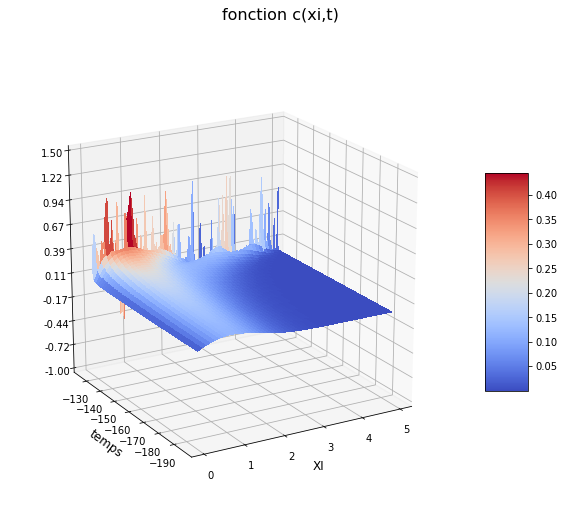

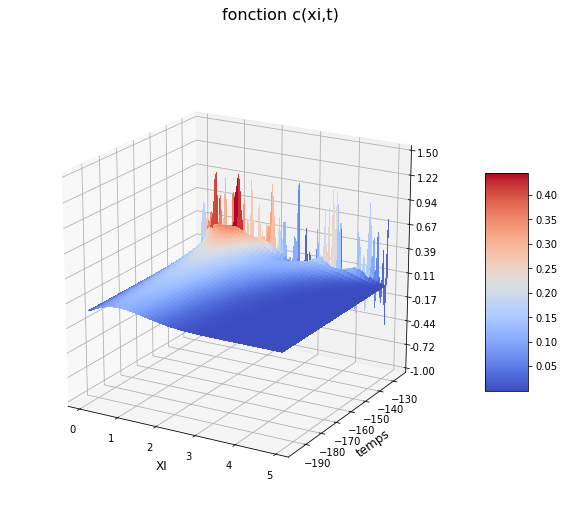

In [31]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

xi=(1/100)*numpy.linspace(5,99*5,99)
t=(10^(-8))*numpy.linspace(10^(3),10^(4),9001)
xi, t = numpy.meshgrid(xi, t)
Z = data

surf = ax.plot_surface(xi, t, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.suptitle('fonction c(xi,t)',fontsize=16)
plt.xlabel('XI',fontsize=12)
plt.ylabel('temps',fontsize=12)
ax.view_init(azim=240)
ax.elev=20
ax.set_zlim(-1.00, 1.50)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')


xi=(1/100)*numpy.linspace(5,99*5,99)
t=(10^(-8))*numpy.linspace(10^(3),10^(4),9001)
xi, t = numpy.meshgrid(xi, t)
Z = data

surf = ax.plot_surface(xi, t, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.suptitle('fonction c(xi,t)',fontsize=16)
plt.xlabel('XI',fontsize=12)
plt.ylabel('temps',fontsize=12)
ax.elev=20
ax.set_zlim(-1.00, 1.50)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()